### Theory of Neural Networks
Neural networks can be used for both classification and prediction problems. In this context, we aim to classify which points belong to which classes. We'll start by linearly transforming the coordinates of the points, then employ the sigmoid function to predict whether a given point belongs to a specific class. During the backward pass, we compute the prediction error and adjust the weights of our neural network accordingly. We'll begin by generating a non-linear dataset, followed by defining the dimensions of our problem. Subsequently, we'll implement the forward pass and the backward pass, train our model, and finally make predictions regarding the class.

### Generating a Non-Linear Dataset
We employ polar coordinates to generate a set of values within a circle and introduce noise for a more realistic distribution.

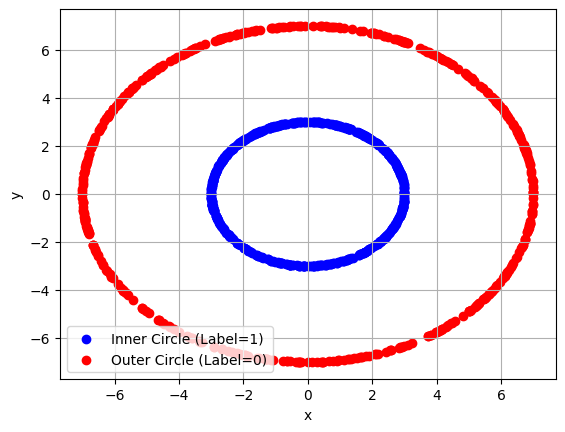

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def generate_noise(shape, noise_magnitude):
    """Generate random noise of given shape and magnitude."""
    return np.random.uniform(-noise_magnitude, noise_magnitude, shape)

def non_linear_dataset(r1, r2, size_of_sample, noise_magnitude=0):
    
    """Generate a dataset with inner and outer circles."""
    X = np.zeros((size_of_sample, 2))
    Y = np.zeros((size_of_sample, 1))

    # Using polar coordinates to generate a sample of values in a circle and adding noise

    random.seed(0)
    
    θ = np.random.uniform(0, 2*np.pi, int(np.floor(size_of_sample/2)))

    εx_inner = generate_noise(θ.shape[0], noise_magnitude)
    εy_inner = generate_noise(θ.shape[0], noise_magnitude)
    εx_outer = generate_noise(θ.shape[0], noise_magnitude)
    εy_outer = generate_noise(θ.shape[0], noise_magnitude)

    inner_circle = np.column_stack((r1 * np.cos(θ) + εx_inner, r1 * np.sin(θ) + εy_inner))
    outer_circle = np.column_stack((r2 * np.cos(θ) + εx_outer, r2 * np.sin(θ) + εy_outer))
    
    X = np.vstack((inner_circle, outer_circle))

    # Assigning labels to the Y vector

    Y[:int(size_of_sample/2), 0] = 1  # Inner circle
    Y[int(size_of_sample/2):, 0] = 0  # Outer circle

    return X, Y

def plot_dataset(X, Y):
    """Plot the dataset with different labels."""
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='blue', label='Inner Circle (Label=1)')
    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='red', label='Outer Circle (Label=0)')
    plt.legend()
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

X, Y = non_linear_dataset(3, 7, 1000)
plot_dataset(X, Y)

### Dimensions of Our Problem

Each point is represented by two coordinates (x,y), resulting in an input dimension of 2. Our goal is to determine the probability of whether or not a pair of points belongs to a particular class, giving us an output size of 1. Determining the optimal number of neurons in the hidden layer can be challenging; however, we'll start by setting it to 3.

In [27]:
# Define the dimensions for our neural network architecture

# Number of input nodes, corresponding to the data's feature count (e.g., x and y coordinates)
input_size = 2

# Number of output nodes, typically representing prediction classes or regression outputs
output_size = 1

# Number of nodes in the hidden layer
hidden_layer_size = 3


### Forward Pass in a 2-Layer Neural Network

In this section, we'll walk through the forward pass of a 2-layer neural network implemented in Python. This network comprises an input layer, one hidden layer, and an output layer.

#### Linear Transformation
The input to the neural network undergoes a linear transformation to produce the input for the hidden layer neurons. For a given input vector $X$ and the first hidden neuron, the transformation is computed as:

$$
Z^{[1]} = W^{[1]} \cdot X + b^{[1]}
$$

where:
- $Z^{[1]}$ is the linear transformation's output for the hidden layer.
- $W^{[1]}$ represents the weight matrix for the first layer.
- $X$ is the input feature vector.
- $b^{[1]}$ is the bias vector for the first layer.

#### Sigmoid Activation Function
Each neuron in the hidden layer uses a sigmoid activation function to introduce non-linearity. The function is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

The element-wise application of the sigmoid function to $Z^{[1]}$ provides the activation $A^{[1]}$ for the hidden layer.

#### Forward Propagation to the Output Layer
The activations from the hidden layer are then propagated forward, undergoing another linear transformation to produce the input for the output layer neuron:

$$
Z^{[2]} = W^{[2]} \cdot A^{[1]} + b^{[2]}
$$

where:
- $Z^{[2]}$ is the linear transformation's output for the output layer.
- $W^{[2]}$ represents the weight matrix for the second layer.
- $A^{[1]}$ is the activation from the hidden layer.
- $b^{[2]}$ is the bias for the output layer.

Finally, the sigmoid activation function is applied to $Z^{[2]}$ to obtain the network's output $A^{[2]}$, which represents the predicted probability in a binary classification task.

**Note:** This implementation assumes the neural network is designed for binary classification, where the output is interpreted as the probability of the input belonging to one of the two classes. The sigmoid function is particularly suitable for this purpose, as it confines the output between 0 and 1, which can be directly treated as a probability.


In [28]:
def sigmoid(x):
    """Calculate the sigmoid of x."""
    return 1 / (1 + np.exp(-x))

def sigmoid_vectorized(X): 
    """Apply the sigmoid function element-wise to a vector X."""
    return sigmoid(X)

def forward_pass(X, W1, b1, W2, b2):
    """Compute the forward pass for a 2-layer neural network."""

    # Compute the output of the hidden layer.
    # print(X.reshape(2,1))
    Z1 = np.dot(W1, X) + b1

    # print(f"Z1 est  {Z1} , {Z1.shape}")
    a1 = sigmoid_vectorized(Z1.reshape(hidden_layer_size,1))

    # Compute the output of the neural network.
    Z2 = np.dot(W2, a1) + b2
    output = sigmoid_vectorized(Z2)

    return (Z1, a1, Z2, output)

### Backward Pass and Cross-Entropy Loss Implementation

#### Cross-Entropy Loss
We define the cost with the cross-entropy loss function, which measures the performance of a classification model whose output is a probability value between 0 and 1. The loss increases as the predicted probability diverges from the actual label. For a binary classification problem, it is defined as follows:

$$
L(y,\hat{y}) = - \sum ( y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) )
$$

where:
- $y$ is the actual label (0 or 1),
- $\hat{y}$ is the predicted probability of the class label being 1.

#### Backward Pass
The backward pass involves computing the gradients of the loss function with respect to the weights and biases in the network. These gradients are used to update the weights and biases during the training process.

For a network with a single hidden layer, the gradients of the loss with respect to the weights in the second layer $W^{[2]}$ are calculated as follows:

$$
\frac{\partial L}{\partial W^{[2]}} = dZ^{[2]} \cdot (A^{[1]})^T
$$

where:
- $dZ^{[2]}$ is the derivative of the loss function with respect to the output of the second layer, which is also the difference between the predicted output and the actual label, $\hat{y} - y$.
- $A^{[1]}$ is the activation of the first (hidden) layer.

The gradient with respect to the bias term $b^{[2]}$ is the sum of the derivatives:

$$
\frac{\partial L}{\partial b^{[2]}} = \sum dZ^{[2]}
$$

The gradients for the first layer $W^{[1]}$ take into account the derivative of the activation function used in the first layer, which in our case is the sigmoid function. Thus, the gradient with respect to the first layer's weights is:

$$
\frac{\partial L}{\partial W^{[1]}} = (W^{[2]})^T \cdot dZ^{[2]} \cdot A^{[1]} \cdot (1 - A^{[1]}) \cdot X^T
$$

and similarly, the gradient with respect to the bias term $b^{[1]}$ is:

$$
\frac{\partial L}{\partial b^{[1]}} = \sum ((W^{[2]})^T \cdot dZ^{[2]}) \cdot A^{[1]} \cdot (1 - A^{[1]})
$$

These gradients are used to perform gradient descent to update the weights and biases in the direction that minimizes the loss function.


In [29]:
def cross_entropy(y, yhat):
    """
    Compute the cross-entropy loss.

    Parameters:
    - y (float): Actual value (label).
    - yhat (float): Predicted value.

    Returns:
    - J (float): Cross-entropy loss.
    """
    J = -y*np.log(yhat) - (1-y)*np.log(1-yhat)
    return J

def backward_pass(a1, output, y, W2, x):
    """
    Perform the backward propagation to compute gradients.

    Parameters:
    - a1 (numpy array): Activation from the previous layer.
    - output (numpy array): Predicted values.
    - y (numpy array): Actual values (labels).
    - W2 (numpy array): Weights of the next layer.
    - x (numpy array): Input features.

    Returns:
    - dw2 (numpy array): Gradient of weights for the next layer.
    - db2 (float): Gradient of bias for the next layer.
    - dw1 (numpy array): Gradient of weights for the current layer.
    - db1 (float): Gradient of bias for the current layer.
    """
    
    # Printing the input variables
    # print(f"a1 : {a1} \n a1.t {a1.T} \n shape {a1.shape}")
    # print(f"output : {output}")
    # print(f"y : {y}")
    # print(f"W2 : {W2}")
    # print(f"x : {x}")
    
    # Compute the difference between the predicted and actual values
    dZ2 = output - y 
    
    # Calculate gradient for weights and bias for the next layer
    dw2 = np.dot(dZ2, a1.T)
    db2 = np.sum(dZ2)
    
    # Calculate the gradient for the current layer
    dZ1 = np.dot(W2.T, dZ2) * a1 * (1 - a1)

    dw1 = np.dot(dZ1, x.reshape(2,1).T)
    db1 = np.sum(dZ1)

    return dw2, db2, dw1, db1


### Neural Network Training Process

The training function `training_set` is designed to optimize the weights and biases of a neural network over multiple iterations or epochs using gradient descent. The goal is to minimize the loss function, which in this case, is computed by the cross-entropy loss between the actual labels and predictions. The function's operations are as follows:

1. **Initialization**:
   Weights (`W1`, `W2`) and biases (`b1`, `b2`) are initialized randomly. This is a common practice to break symmetry and ensure that the learning process starts with non-uniform patterns.

2. **Epochs**:
   The training process iterates over a fixed number of epochs (`N`). In each epoch, the neural network undergoes a forward pass followed by a backward pass for each data point.

3. **Forward Pass**:
   Each input vector `x` is passed through the neural network, calculating the outputs of the intermediate layers (`Z1`, `a1`) and the final prediction (`output`) using the `forward_pass` function.

4. **Cost Computation**:
   The cross-entropy loss (`J`) for the current prediction is computed by the `cross_entropy` function, which measures how well the predicted probabilities match the actual class labels.

5. **Backward Pass**:
   Gradients of the loss with respect to the weights and biases are computed using the `backward_pass` function. These gradients indicate the direction in which the weights and biases need to be adjusted to minimize the loss.

6. **Gradient Descent**:
   The weights and biases are updated by subtracting a fraction (`lr` or learning rate) of the gradients from their current values. This fraction controls the size of the step taken towards the minimum of the loss function at each iteration.

7. **Loss Accumulation**:
   The loss for each epoch is summed and recorded in a list `cost`. This allows monitoring of the learning process over time to ensure that the loss is decreasing.

8. **Monitoring**:
   Optionally, the function prints out the cost at regular intervals (every 100 epochs in this case) to track the progress of the training.

At the end of training, the function returns the updated weights and biases, along with the history of the cost, which can be used for analysis and visualization of the learning process.

### Training Execution

To train the neural network, we define a learning rate (`lr`) and the number of epochs (`N`). The `training_set` function is then called with a subset of the input features `X[:800]` and the corresponding labels `Y`, and it outputs the optimized parameters and cost history.


In [30]:
def training_set(X, Y, N, lr):
    """
    Train the neural network using the given training set and parameters.

    Parameters:
    - X (numpy array): Input features.
    - Y (numpy array): Actual values (labels).
    - N (int): Number of epochs.
    - lr (float): Learning rate.

    Returns:
    - W1, W2 (numpy arrays): Updated weights for the layers.
    - b1, b2 (numpy arrays): Updated biases for the layers.
    - cost (list): Cost at each epoch.
    """

    # Initialize weights and biases with random values
    
    W1 = np.random.randn(hidden_layer_size, input_size)
    b1 = np.random.randn(hidden_layer_size)
    W2 = np.random.randn(output_size, hidden_layer_size)
    b2 = np.random.randn(output_size)

    cost = np.zeros(N)
    

    # Training loop for N epochs

    for epochs in range(N):

        loss_ = 0

        # Initialize gradients to zero for each epoch

        dw2 = np.zeros((output_size, hidden_layer_size))
        db2 = np.zeros(output_size)
        dw1 = np.zeros((hidden_layer_size, input_size))
        db1 = np.zeros(hidden_layer_size)

        # Loop through each data point in the training set

        for (index, x) in enumerate(X):
            
            # Perform forward pass and get the intermediate outputs

            (Z1, a1, Z2, output) = forward_pass(x, W1, b1, W2, b2)

            # Compute the cost for the current data point

            J = cross_entropy(Y[index], output)
            
            # Accumulate the loss

            loss_ += J

            # Perform backward pass and get the gradients

            dw2_, db2_, dw1_, db1_ = backward_pass(a1, output, Y[index], W2, x)
            
            # Update weights and biases using gradient descent
            W2 = W2 - lr * dw2_
            W1 = W1 - lr * dw1_
            b1 = b1 - lr * db1_
            b2 = b2 - lr * db2_

        cost[epochs] = loss_

        # Print the loss every 20 epochs for monitoring

        if epochs % 100 == 0:
            print(f"Époque : {epochs} Coût : {cost[epochs]}")

    return (W1, W2, b2, b1, cost)

# Define learning rate and number of epochs

lr = 0.01
N = 400

# Train the network and get the trained parameters and cost history
(W1, W2, b2, b1, cost) = training_set(X[:800], Y, N, lr)


/var/folders/j2/6x29nmr16_n05lg6jrjrb0nc0000gn/T/ipykernel_57793/2822247308.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[epochs] = loss_


Époque : 0 Coût : 476.4722128924768
Époque : 100 Coût : 23.092920495280826
Époque : 200 Coût : 9.51145715798014
Époque : 300 Coût : 5.87435739660798


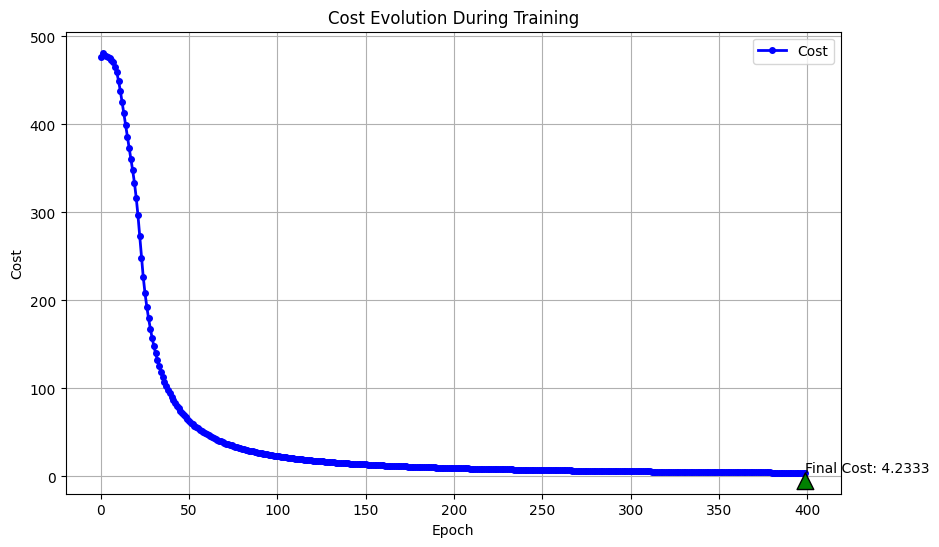

In [31]:
# Plot configuration
plt.figure(figsize=(10, 6))  
plt.plot([x for x in range(N)], cost, color='blue', linestyle='-', linewidth=2, marker='o', markersize=4, label='Cost')
plt.title('Cost Evolution During Training')  
plt.xlabel('Epoch') 
plt.ylabel('Cost')  
plt.grid(True) 
plt.legend()  

# Annotation for the last cost value
plt.annotate(f'Final Cost: {cost[-1]:.4f}', 
             xy=(N-1, cost[-1]), 
             xytext=(N-1, cost[-1] + 0.1),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.show()

### Cost Evolution Interpretation:

The graph illustrates the neural network's learning progression, showcasing an initial rapid decrease in cost during the first 150 epochs, followed by a more gradual decline, eventually plateauing around a final cost of 4.2333.

### The provided code snippet is used for predicting the outcomes based on a trained neural network. It performs the following steps:

For each input x in X, it computes the neural network's prediction using the forward_pass function, which returns the computed output. This output is then appended to the predictions list.
After obtaining all predictions, the code categorizes each prediction as 1 (true) or 0 (false) based on a threshold of 0.5.
To determine the classification accuracy, the code compares these binary predictions to the actual labels Y. It then calculates the proportion of correct predictions to the total number of predictions.
Finally, the code prints the computed accuracy.

In [34]:
predictions = []

for x in X : 
    (Z1, a1, Z2, output) = forward_pass(x, W1, b1, W2, b2)
    predictions.append(output)

# Make binary decision

binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

# classification accuracy

correct_predictions = sum(1 for pred, true in zip(binary_predictions, Y) if pred == true)
accuracy = correct_predictions / len(Y)


print(accuracy)

1.0


### Visualizing Neural Network Classification through Decision Boundaries
After updating the weights and biases of the neural network, it's essential to visualize its performance and the decision-making process. The provided code offers a way to display the 'decision boundary', which is a visual representation of how the neural network classifies 2D data points. In the graph below, we can observe distinct shaded regions representing the different classifications predicted by the neural network. The actual data points, illustrated as circles, are overlaid on this map. The varying shades, from light pink to dark blue, indicate the confidence of the neural network in its predictions, with darker shades signifying higher confidence. The clear demarcation between these regions indicates the areas where the neural network believes one classification changes to another. By juxtaposing the true data points with these shaded regions, we gain insights into the network's accuracy and how well it understands the underlying patterns in the data

/var/folders/j2/6x29nmr16_n05lg6jrjrb0nc0000gn/T/ipykernel_57793/3502792880.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _,_,_,Z[i] = forward_pass(np.c_[xx.ravel(), yy.ravel()][i], W1, b1, W2, b2)


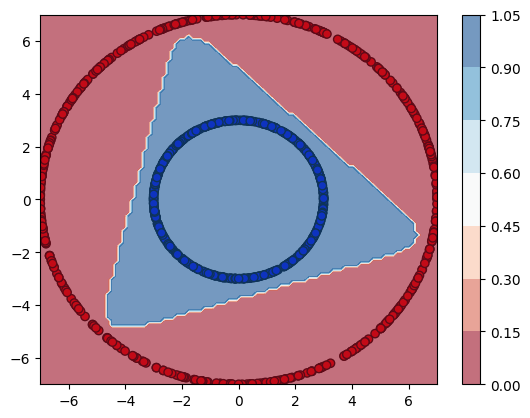

In [36]:
grid_size = 100

x = np.linspace(-7,7,grid_size)
y = np.linspace(-7,7,grid_size)

def plot_decision_boundary(x,y,X,labels):

    # x and y are the vectors giving the extent of the 2D grid
    # X is the data, labels the true labels to plot the data on top of the boundaries
    
    # define grid of points
    
    [xx,yy] = np.meshgrid(x,y)

    Z = np.zeros(grid_size*grid_size)
    
    # compute binary predictions for all the points of the grid
    
    for i in range(np.shape(Z)[0]) : 
         _,_,_,Z[i] = forward_pass(np.c_[xx.ravel(), yy.ravel()][i], W1, b1, W2, b2)

    
    Z[Z>0.5] = 1
    Z[Z<=0.5] = 0
    
    Z = Z.reshape(grid_size,grid_size)

    # scatterplot of the data and contour lines of the decision function
    
    plt.scatter(X[:,0],X[:,1], c = labels,cmap=cm_bright,edgecolors='k')
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.6)
    
# use the function to show all the info
    
plot_decision_boundary(x,y,X,Y[:,0])
plt.colorbar()

### Adapting Neural Networks for Regression Tasks
To repurpose the neural network code for regression problems, a few alterations are essential:

Loss Function:

We would transition from a binary cross-entropy loss to the Mean Squared Error (MSE) tailored for regression scenarios. The MSE is described by the equation:
\begin{equation*}
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
\end{equation*}
Here, $y_i$ denotes the actual value, $\hat{y}_i$ signifies the predicted value, and $N$ represents the number of data samples.

Output Layer Activation:

For regression problems, the output layer should adopt a linear activation function (or no activation at all). This ensures the network outputs continuous values instead of probabilities.

Evaluation Metrics:

For regression tasks, typical evaluation metrics include:

Mean Absolute Error (MAE): This metric calculates the average of the absolute differences between the predicted and actual outcomes. Formally:
\begin{equation*}
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation*}
Root Mean Squared Error (RMSE): Essentially the square root of MSE, it provides a sense of the average deviation of the predictions from the true values. Expressed as:
\begin{equation*}
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation*}
Both metrics are invaluable as they shed light on the magnitude of prediction errors. Specifically, the RMSE metric gives greater weight to larger discrepancies compared to MAE.